<a href="https://colab.research.google.com/github/1rn19cs176varunalingam/music-recommendation-system/blob/main/ml_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install spotipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spotipy
import os
%matplotlib inline

In [3]:
df = pd.read_csv('/content/drive/MyDrive/training ML/data.csv')

In [4]:
df.head

<bound method NDFrame.head of         valence  year  acousticness  \
0        0.0594  1921       0.98200   
1        0.9630  1921       0.73200   
2        0.0394  1921       0.96100   
3        0.1650  1921       0.96700   
4        0.2530  1921       0.95700   
...         ...   ...           ...   
170648   0.6080  2020       0.08460   
170649   0.7340  2020       0.20600   
170650   0.6370  2020       0.10100   
170651   0.1950  2020       0.00998   
170652   0.6420  2020       0.13200   

                                                  artists  danceability  \
0       ['Sergei Rachmaninoff', 'James Levine', 'Berli...         0.279   
1                                          ['Dennis Day']         0.819   
2       ['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...         0.328   
3                                        ['Frank Parker']         0.275   
4                                          ['Phil Regan']         0.418   
...                                                

In [5]:
df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [6]:
df.describe()

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
count,170653.000000,170653.000000,170653.000000,170653.000000,1.706530e+05,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000
mean,0.528587,1976.787241,0.502115,0.537396,2.309483e+05,0.482389,0.084575,0.167010,5.199844,0.205839,-11.467990,0.706902,31.431794,0.098393,116.861590
std,0.263171,25.917853,0.376032,0.176138,1.261184e+05,0.267646,0.278249,0.313475,3.515094,0.174805,5.697943,0.455184,21.826615,0.162740,30.708533
min,0.000000,1921.000000,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000
25%,0.317000,1956.000000,0.102000,0.415000,1.698270e+05,0.255000,0.000000,0.000000,2.000000,0.098800,-14.615000,0.000000,11.000000,0.034900,93.421000
50%,0.540000,1977.000000,0.516000,0.548000,2.074670e+05,0.471000,0.000000,0.000216,5.000000,0.136000,-10.580000,1.000000,33.000000,0.045000,114.729000
75%,0.747000,1999.000000,0.893000,0.668000,2.624000e+05,0.703000,0.000000,0.102000,8.000000,0.261000,-7.183000,1.000000,48.000000,0.075600,135.537000
max,1.000000,2020.000000,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.970000,243.507000


In [7]:
df['duration_min'] = df['duration_ms']/60000
df['duration_min'] = df['duration_min'].round(2)
df['duration_min'].head()

0    13.86
1     3.01
2     8.33
3     3.50
4     2.78
Name: duration_min, dtype: float64

In [8]:
df["artists"]=df["artists"].str.replace("[", "")
df["artists"]=df["artists"].str.replace("]", "")
df["artists"]=df["artists"].str.replace("'", "")
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,duration_min
0,0.0594,1921,0.982,"Sergei Rachmaninoff, James Levine, Berliner Ph...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954,13.86
1,0.9630,1921,0.732,Dennis Day,0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936,3.01
2,0.0394,1921,0.961,KHP Kridhamardawa Karaton Ngayogyakarta Hadini...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339,8.33
3,0.1650,1921,0.967,Frank Parker,0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109,3.50
4,0.2530,1921,0.957,Phil Regan,0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665,2.78


In [9]:
df['Song Decade'] = None

df.loc[(df['year'] >= 1920) & (df['year'] < 1930), 'Song Decade'] = '1920s'
df.loc[(df['year'] >= 1930) & (df['year'] < 1940), 'Song Decade'] = '1930s'
df.loc[(df['year'] >= 1940) & (df['year'] < 1950), 'Song Decade'] = '1940s'
df.loc[(df['year'] >= 1950) & (df['year'] < 1960), 'Song Decade'] = '1950s'
df.loc[(df['year'] >= 1960) & (df['year'] < 1970), 'Song Decade'] = '1960s'
df.loc[(df['year'] >= 1970) & (df['year'] < 1980) , 'Song Decade'] = '1970s'
df.loc[(df['year'] >= 1980) & (df['year'] < 1990) , 'Song Decade'] = '1980s'
df.loc[(df['year'] >= 1990) & (df['year'] < 2000) , 'Song Decade'] = '1990s'
df.loc[(df['year'] >= 2000) & (df['year'] < 2010) , 'Song Decade'] = '2000s'
df.loc[(df['year'] >= 2010) & (df['year'] < 2020) , 'Song Decade'] = '2010s'
df.loc[(df['year'] >= 2020) & (df['year'] < 2030) , 'Song Decade'] = '2020s'

In [10]:
df.head()


,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,...,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,duration_min,Song Decade
0,0.0594,1921,0.982,"Sergei Rachmaninoff, James Levine, Berliner Ph...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,...,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954,13.86,1920s
1,0.9630,1921,0.732,Dennis Day,0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,...,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936,3.01,1920s
2,0.0394,1921,0.961,KHP Kridhamardawa Karaton Ngayogyakarta Hadini...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,...,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339,8.33,1920s
3,0.1650,1921,0.967,Frank Parker,0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,...,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109,3.50,1920s
4,0.2530,1921,0.957,Phil Regan,0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,...,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665,2.78,1920s


In [11]:
df.duplicated().any().sum()

0

In [12]:
df[(df['artists'] == "Billie Holiday") & (df['name']== "No Regrets - Take 1")]

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,...,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,duration_min,Song Decade
2293,0.77,1933,0.93,Billie Holiday,0.721,155667,0.186,0,65YsrE85spoEzDa3O8iCPT,0.000145,...,0.351,-13.833,1,No Regrets - Take 1,17,1933,0.0458,129.452,2.59,1930s
2298,0.77,1933,0.93,Billie Holiday,0.721,155667,0.186,0,4FU5KzT1MaIuIV4thAY870,0.000145,...,0.351,-13.833,1,No Regrets - Take 1,17,1933,0.0458,129.452,2.59,1930s


In [13]:
df = df.drop(labels=['id', 'release_date'], axis=1)
df.shape

(170653, 19)

In [14]:
df.duplicated().sum()

565

In [15]:
df = df[~df.duplicated()==1]
df.shape

(170088, 19)

In [16]:
df.duplicated().sum()

0

In [17]:
df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,duration_min,Song Decade
0,0.0594,1921,0.982,"Sergei Rachmaninoff, James Levine, Berliner Ph...",0.279,831667,0.211,0,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,0.0366,80.954,13.86,1920s
1,0.9630,1921,0.732,Dennis Day,0.819,180533,0.341,0,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,0.4150,60.936,3.01,1920s
2,0.0394,1921,0.961,KHP Kridhamardawa Karaton Ngayogyakarta Hadini...,0.328,500062,0.166,0,0.913000,3,0.101,-14.850,1,Gati Bali,5,0.0339,110.339,8.33,1920s
3,0.1650,1921,0.967,Frank Parker,0.275,210000,0.309,0,0.000028,5,0.381,-9.316,1,Danny Boy,3,0.0354,100.109,3.50,1920s
4,0.2530,1921,0.957,Phil Regan,0.418,166693,0.193,0,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,0.0380,101.665,2.78,1920s


In [18]:
#so here we will see how much time is required for user to play all the songs in the dataset
df.duration_min.sum()/(24*365*60)
#so this will show how many years are required to play all the songs which is 1.24 year 

1.245739897260274

In [19]:
plt.rcParams.update({'font.size': 22})

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

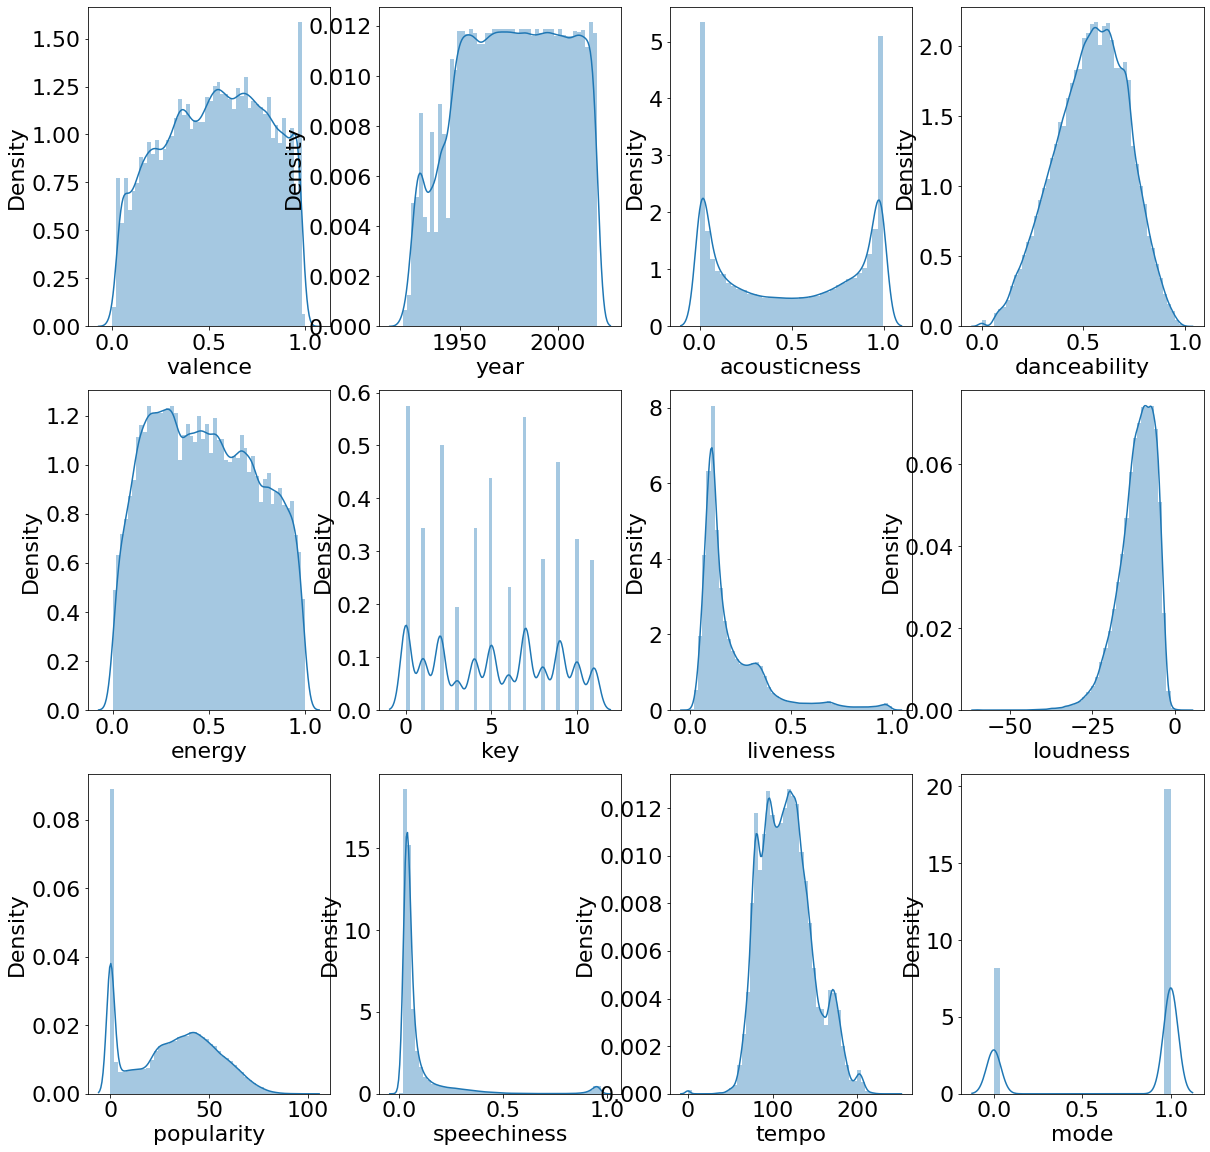

In [20]:
fig,ax = plt.subplots(3,4,figsize=(20,20))

sns.distplot(df['valence'],ax=ax[0,0])
sns.distplot(df['year'],ax=ax[0,1])
sns.distplot(df['acousticness'],ax=ax[0,2])
sns.distplot(df['danceability'],ax=ax[0,3])
#sns.distplot(df['duration_min'],ax=ax[1,1])
sns.distplot(df['energy'],ax=ax[1,0])
sns.distplot(df['key'],ax=ax[1,1])
sns.distplot(df['liveness'],ax=ax[1,2])
sns.distplot(df['loudness'],ax=ax[1,3])
sns.distplot(df['popularity'],ax=ax[2,0])
sns.distplot(df['speechiness'],ax=ax[2,1])
sns.distplot(df['tempo'],ax=ax[2,2])
sns.distplot(df['mode'],ax=ax[2,3])

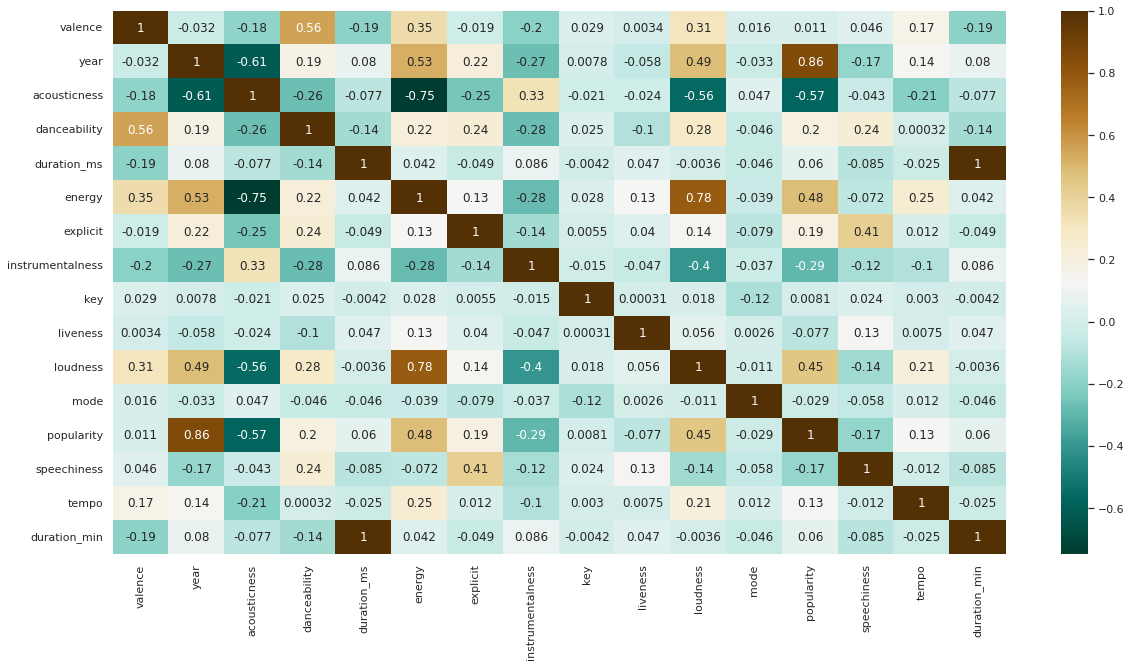

In [21]:
plt.figure(figsize=(20,10))
sns.set(style="whitegrid")
corr = df.corr()
sns.heatmap(corr,annot=True,cmap='BrBG_r',annot_kws={"fontsize":12})


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 <a list of 7 Text major ticklabel objects>)

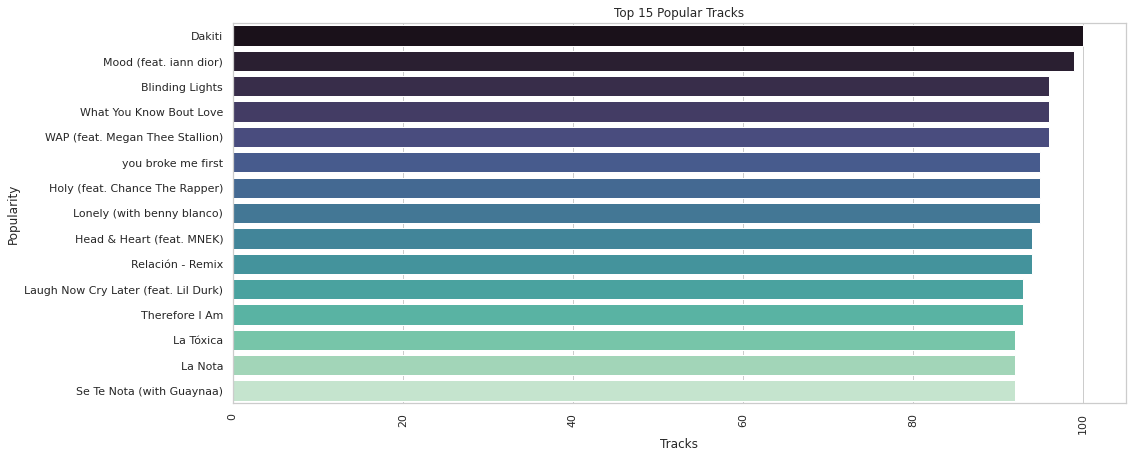

In [22]:
fig, axis = plt.subplots(figsize = (16,7))
popular = df.groupby("name")['popularity'].mean().sort_values(ascending=False).head(15)
axis = sns.barplot(popular,popular.index,palette="mako",orient = 'h')
axis.set_title('Top 15 Popular Tracks')
axis.set_ylabel('Popularity')
axis.set_xlabel('Tracks')
plt.xticks(rotation = 90)
#the top 15 popular songs rn

In [23]:
# For transformations and predictions
from scipy.optimize import curve_fit
from yellowbrick.target import FeatureCorrelation
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

# For scoring
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score,mean_absolute_error

# For validation
from sklearn.model_selection import train_test_split

In [24]:
cols = list(pd.read_csv('/content/drive/MyDrive/training ML/data.csv', nrows =1))
df1 = pd.read_csv('/content/drive/MyDrive/training ML/data.csv', usecols=[i for i in cols if i not in ['id','name','release_date']])

# Remove duplicated
df1 = df1[~df1.duplicated()==1]

#Split the data to train and test
X_train, X_test, y_train, y_test = train_test_split(df1.drop('popularity', axis=1), df1['popularity'], test_size = 0.2, random_state = 42)

In [25]:
X_train.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo
74462,0.484,2017,0.2060,['Christian French'],0.550,234192,0.580,0,0.000001,4,0.1190,-7.687,0,0.0784,82.270
146712,0.763,1975,0.5110,['The Marshall Tucker Band'],0.528,150933,0.812,0,0.000284,2,0.1570,-4.983,1,0.0517,110.442
158411,0.931,1959,0.8230,"[""Anita O'Day""]",0.460,125707,0.303,0,0.000000,0,0.0676,-12.567,0,0.1070,170.608
109710,0.329,1942,0.0117,['Orchestra Studio 7'],0.582,224967,0.443,0,0.868000,7,0.0895,-12.506,1,0.0307,94.825
128817,0.585,1960,0.7820,['Quincy Jones'],0.681,138467,0.312,0,0.072800,8,0.1690,-11.488,1,0.0723,121.058


In [26]:
class Artists:
    """
     This transformer recives a DF with a feature 'artists' of dtype object
      and convert the feature to a float value as follows:
      1. Replace the data with the artists mean popularity
      2. Replace values where artists appear less than MinCnt with y.mean()
      3. Replace values where artists appear more than MaxCnt with 0
      
      PARAMETERS:
      ----------
      MinCnt (int): Minimal treshold of artisits apear in dataset, default = 3
      MaxCnt (int): Maximal treshold of artisits apear in dataset, default = 600

      RERTURN:
      ----------
      A DataFrame with converted artists str feature to ordinal floats
    
    """
    def __init__(self, MinCnt = 3.0, MaxCnt = 600.0):
        self.MinCnt = MinCnt
        self.MaxCnt = MaxCnt
        self.artists_df = None

    def fit (self, X, y):
        self.artists_df =  y.groupby(X.artists).agg(['mean', 'count'])
        self.artists_df.loc['unknown'] = [y.mean(), 1]
        self.artists_df.loc[self.artists_df['count'] <= self.MinCnt, 'mean'] = y.mean()
        self.artists_df.loc[self.artists_df['count'] >= self.MaxCnt, 'mean'] = 0
        return self

    def transform(self, X, y=None):
        X['artists'] = np.where(X['artists'].isin(self.artists_df.index), X['artists'], 'unknown')
        X['artists'] = X['artists'].map(self.artists_df['mean'])
        return X
  
    
#Instrumental Transformer Criteria

def instrumental(X):
    X['instrumentalness'] = list(map((lambda x: 1 if x < 0.1 else (3 if x > 0.95 else 2)), X.instrumentalness))
    
    
class Tempo():
    """Eliminates Zero values from tempo columns and replace it 
       with the median or mean of non-zero values as specified.
       defaut is set to 'median'.
    """

    def __init__(self, method='median'):
        self.method = method

    def transform(self, X):
        if self.method == 'median':
            X.loc[X['tempo']==0, 'tempo'] = X.loc[X['tempo']>0, 'tempo'].median()
        elif self.method == 'mean':
            X.loc[X['tempo']==0, 'tempo'] = X.loc[X['tempo']>0, 'tempo'].mean()
        else:
            raise Exception("Method can be 'median' or 'mean' only!")
        return X

In [27]:
# Apply Aritists class on train and test seperatly
artists_transformer = Artists(MinCnt=2)
X_train = artists_transformer.fit(X_train, y_train).transform(X_train, y_train)
X_test = artists_transformer.transform(X_test, y_test)

#Apply Instrumental Criteria on train & test seperately
instrumentalness_tranformer = FunctionTransformer(instrumental)
instrumentalness_tranformer.transform(X_train)
instrumentalness_tranformer.transform(X_test)

#Apply Tempo Transformer class on Train & Test seperately
tempo_transformer = Tempo()
X_train = tempo_transformer.transform(X_train)
X_test = tempo_transformer.transform(X_test)

In [28]:
ohe = OneHotEncoder(categories='auto', drop='first')

# Train
feature_arr = ohe.fit_transform(X_train[['instrumentalness','key']]).toarray()
columns_key = ['key_'+str(i) for i in list(set(X_train['key'].values))[1:]]
instrumentalness_key = ['ins_'+str(i) for i in list(set(X_train['instrumentalness'].values))[1:]]
feature_labels = columns_key + instrumentalness_key
feature_labels = np.concatenate((feature_labels), axis=None)
features = pd.DataFrame(feature_arr, columns = feature_labels, index = X_train.index)
X_train = pd.concat([X_train, features], axis=1).drop(['key','instrumentalness'], axis=1)

# Test
feature_arr = ohe.fit_transform(X_test[['instrumentalness','key']]).toarray()
columns_key = ['key_'+str(i) for i in list(set(X_test['key'].values))[1:]]
instrumentalness_key = ['ins_'+str(i) for i in list(set(X_test['instrumentalness'].values))[1:]]
feature_labels = columns_key + instrumentalness_key
feature_labels = np.concatenate((feature_labels), axis=None)
features = pd.DataFrame(feature_arr, columns = feature_labels, index = X_test.index)
X_test = pd.concat([X_test, features], axis=1).drop(['key','instrumentalness'], axis=1)

In [29]:
scaler = MinMaxScaler()
cols = ['artists','duration_ms','loudness','tempo']
X_train[cols] = scaler.fit_transform(X_train[cols])
X_test[cols] = scaler.fit_transform(X_test[cols])

In [30]:
# Divide the popularity by 100
y_train = y_train / 100
y_test = y_test / 100

In [31]:
def normalize_column(col):
    """
    col - column in the dataframe which needs to be normalized
    """
    max_d = df[col].max()
    min_d = df[col].min()
    df[col] = (df[col] - min_d)/(max_d - min_d)

In [32]:
#Normalize allnumerical columns so that min value is 0 and max value is 1
num_types = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num = df.select_dtypes(include=num_types)
        
for col in num.columns:
    normalize_column(col)

In [33]:
km = KMeans(n_clusters=25)
pred = km.fit_predict(num)
df['pred'] = pred
normalize_column('pred')

In [34]:
class Song_Recommender():
    """
    Neighbourhood Based Collborative Filterng REcoomendation System using similarity Metrics
    Manhattan Distance is calculated for all songs and Recommend Songs that are similar to it based on any given song
    """
    def __init__(self, data):
        self.data_ = data
    
    #function which returns recommendations, we can also choose the amount of songs to be recommended
    def get_recommendations(self, song_name, n_top):
        distances = []
        #choosing the given song_name and dropping it from the data
        song = self.data_[(self.data_.name.str.lower() == song_name.lower())].head(1).values[0]
        rem_data = self.data_[self.data_.name.str.lower() != song_name.lower()]
        for r_song in tqdm(rem_data.values):
            dist = 0
            for col in np.arange(len(rem_data.columns)):
                #indeces of non-numerical columns(id,Release date,name,artists)
                if not col in [3,7,13]:
                    #calculating the manhettan distances for each numerical feature
                    dist = dist + np.absolute(float(song[col]) - float(r_song[col]))
            distances.append(dist)
        rem_data['distance'] = distances
        #sorting our data to be ascending by 'distance' feature
        rem_data = rem_data.sort_values('distance')
        columns = ['artists', 'name']
        return rem_data[columns][:n_top]

In [35]:
df.drop(['Song Decade'],axis=1,inplace=True)

In [36]:

from tqdm import tqdm

In [94]:
#Instanstiate the Recommender Class
recommender = Song_Recommender(df)
recommender.get_recommendations('steal my girl',5)

100%|██████████| 170087/170087 [00:08<00:00, 20022.55it/s]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,artists,name
18922,Panic! At The Disco,House of Memories
18091,Rihanna,Diamonds
56152,Chris Brown,Fine China
18650,The Weeknd,Can't Feel My Face
123514,Ocean Alley,Yellow Mellow


In [76]:
import joblib
joblib.dump(recommender,'spam-ham')


['spam-ham']

In [77]:
!pip install streamlit --quiet



In [95]:
%%writefile app.py
from tqdm import tqdm
import streamlit as st
import joblib
import numpy as np
class Song_Recommender():
    """
    Neighbourhood Based Collborative Filterng REcoomendation System using similarity Metrics
    Manhattan Distance is calculated for all songs and Recommend Songs that are similar to it based on any given song
    """
    def __init__(self, data):
        self.data_ = data
    
    #function which returns recommendations, we can also choose the amount of songs to be recommended
    def get_recommendations(self, song_name, n_top):
        distances = []
        #choosing the given song_name and dropping it from the data
        song = self.data_[(self.data_.name.str.lower() == song_name.lower())].head(1).values[0]
        rem_data = self.data_[self.data_.name.str.lower() != song_name.lower()]
        for r_song in tqdm(rem_data.values):
            dist = 0
            for col in np.arange(len(rem_data.columns)):
                #indeces of non-numerical columns(id,Release date,name,artists)
                if not col in [3,7,13]:
                    #calculating the manhettan distances for each numerical feature
                    dist = dist + np.absolute(float(song[col]) - float(r_song[col]))
            distances.append(dist)
        rem_data['distance'] = distances
        #sorting our data to be ascending by 'distance' feature
        rem_data = rem_data.sort_values('distance')
        columns = ['artists', 'name']
        return rem_data[columns][:n_top]

st.title("music recommendation system")
ip1 = st.text_input("enter a song",key=1)
ip2 = int(st.text_input("enter no. of songs",key=2))
recommender=joblib.load('/content/spam-ham')
op=recommender.get_recommendations(ip1,ip2)

if st.button('recommend'):
  for i in op:
    st.write(op[i])

Overwriting app.py


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501

2022-05-24 06:01:08.011 INFO    numexpr.utils: NumExpr defaulting to 2 threads.

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://104.196.190.56:8501

npx: installed 22 in 3.499s
your url is: https://open-ideas-divide-104-196-190-56.loca.lt
2022-05-24 06:02:11.298 Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/streamlit/scriptrunner/script_runner.py", line 475, in _run_script
    exec(code, module.__dict__)
  File "/content/app.py", line 35, in <module>
    ip2 = int(st.text_input("enter no. of songs",key=2))
ValueError: invalid literal for int() with base 10: ''

100% 170087/170087 [00:05<00:00, 29674.31it/s]
/content/app.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#re